### Perlin Noise

To generate Perlin noise, a number of steps are typically taken:

A grid of random vectors is generated at fixed locations in space. These vectors are typically chosen to have unit length (i.e., they are normalized) and are chosen randomly.

At any given point in space, the grid points closest to that point are identified.

The dot product of the gradient vector (i.e., the randomly chosen vector) and the distance vector between the grid point and the input point is calculated.

The dot product values are interpolated to generate a smooth and continuous noise function.

The noise function can be scaled, thresholded, and combined with other functions to create more complex patterns and textures.

In [95]:
import numpy as np
import random
import math
from PIL import Image 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [130]:
width = 256
height = 256
img  = Image.new( mode = "RGB", size = (width, height) )

In [131]:
pixels = img.load()

In [132]:
pixel_arr = np.zeros((width,height))

In [139]:
for i in range(width):
    for j in range(height):
        pixel_arr[i,j] = pixels[i,j][0]
       

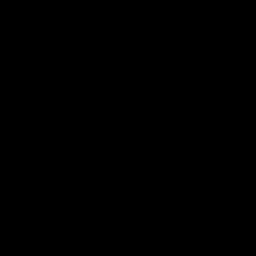

In [140]:
img

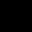

In [141]:
img_left = img.crop((0,0,32,32))
img_left


In [142]:
permutation_mtx = np.zeros(256);

In [143]:
for i in range(256):
    permutation_mtx[i] = i

In [144]:
def shuffle(arraytoshuffle):
    for i in range(permutation_mtx.shape[0]-1,0,-1):
        index =  round(random.random())*(i-1)  
        arraytoshuffle[i] = index
        temp = arraytoshuffle[i]
        arraytoshuffle[index] = temp


In [145]:
shuffle(permutation_mtx)

In [146]:
permutation_mtx

array([  0.,   0.,   0.,   2.,   3.,   4.,   5.,   6.,   0.,   8.,   9.,
        10.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,  18.,   0.,  20.,
        21.,   0.,   0.,   0.,   0.,  26.,  27.,   0.,   0.,  30.,   0.,
         0.,  33.,  34.,   0.,  36.,  37.,  38.,   0.,   0.,  41.,  42.,
        43.,  44.,  45.,   0.,  47.,   0.,   0.,  50.,   0.,  52.,   0.,
         0.,   0.,  56.,  57.,  58.,  59.,   0.,  61.,  62.,   0.,   0.,
         0.,   0.,   0.,  68.,   0.,   0.,  71.,   0.,   0.,   0.,   0.,
        76.,  77.,  78.,  79.,  80.,  81.,   0.,   0.,  84.,   0.,  86.,
        87.,   0.,  89.,  90.,   0.,  92.,   0.,   0.,  95.,  96.,  97.,
         0.,   0.,   0., 101., 102.,   0.,   0., 105.,   0., 107., 108.,
         0.,   0.,   0.,   0., 113., 114.,   0., 116., 117., 118.,   0.,
         0.,   0., 122.,   0., 124., 125.,   0.,   0., 128., 129., 130.,
       131.,   0., 133.,   0., 135., 136., 137., 138., 139., 140.,   0.,
       142.,   0., 144.,   0., 146.,   0.,   0.,   

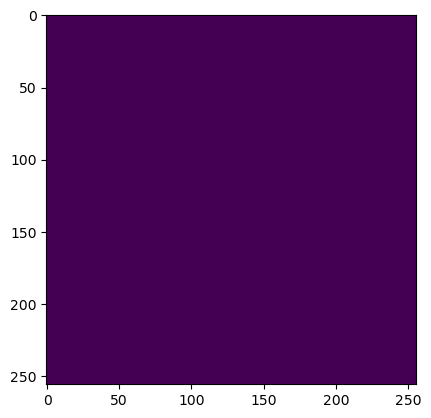

In [148]:
plt.imshow(pixel_arr)

In [49]:
def Lerp(t, a1, a2):
    return a1 + t*(a2-a1);

In [43]:
def Noise2D(i,j):
    
    return

In [47]:
for i in range(height):
    for j in range (width):
        
        n = Noise2D(i*0.01, j*0.01);
        n += 1.0;
        n /= 2.0;

        c = Math.round(255*n);
        pixels[i,j]= (c, c, c);
    


TypeError: unsupported operand type(s) for +=: 'NoneType' and 'int'

### Perlin Noise in 1D (y axis)

In [528]:
def linearInterpolation(y,y_i,alpha):
    f = math.cos(2* math.pi*alpha)
    return (1-f/2)*y + f*y_i/2

In [529]:
rand_points = np.random.rand(100)

In [530]:
resolution = 1000 #Her iki nokta arasını 30 parçaya böl
interpolated_points = np.zeros((rand_points.shape[0]-1) * (resolution) +1)

In [531]:
print(linearInterpolation(y,y_i,alpha))

0.5387793996055082


In [532]:
k = 0
for i in range(0,rand_points.shape[0]-1,1):
    
    for j in range(resolution):
        k+=1;
        y = rand_points[i]
        y_i = rand_points[i+1]     
        alpha = (1*j)/resolution
        interpolated_points[k] = linearInterpolation(y,y_i,alpha)


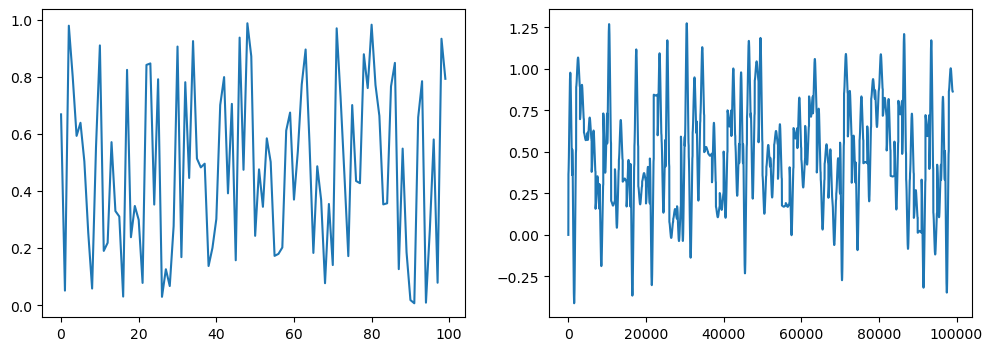

In [533]:
fig ,axs = plt.subplots(1,2,figsize = (12,4))
axs[0].plot(rand_points)
axs[1].plot(interpolated_points)


### Perlin Noise in 2D (x-y)

In [547]:
class Vector2:
    def __init__(self,x, y):
        self.x = x
        self.y = y

    def dot(self,other):
        return self.x*other.x + self.y*other.y

In [552]:
a = Vector2(2,2)
b = Vector2(2,2)
a.dot(b)

8

In [730]:
noise_map_x = np.random.rand(10)
noise_map_y = np.random.rand(10)
resolution = 4
##Slice the image in 4x4 parts so (32x32) / (4x4) = 64 squares to be calculated.


$ \textit{Fade function: }\psi(t) = \frac{6t^5 - 15t^4 + 10t^3}{4} $

In [537]:
def fade(t):
    return t*t*t((6*t*t) - 15*t + 10)

$\Psi(x,y) = \psi(x)\psi(y) = \frac{6x^5 - 15x^4 + 10x}{4} \cdot \frac{6y^5 - 15y^4 + 10y}{4}$

$\textit{writing the noise function: }\text{noise}(x,y) = \Psi(1-x,1-y)\delta[0,0] + \Psi(x,1-y)\delta[1,0] + \Psi(1-x,y)\delta[0,1] + \Psi(x,y)\delta[1,1]$

In [687]:
def linearInterpolation(y,y_i,alpha):
    return (1-alpha/2)*y + alpha*y_i/2

In [716]:
def noise(x,y):
    
    xf = x - math.floor(x)
    yf = y - math.floor(y)
    
    top_right = Vector2(1-xf,yf)
    top_left = Vector2(xf,yf)
    bottom_right = Vector2(1-xf,1-yf)
    bottom_left = Vector2(xf,1-yf)
    
    top_right_dot = top_right.dot(Vector2(xf,yf))
    top_left_dot = top_left.dot(Vector2(xf,yf))
    bottom_right_dot = bottom_right.dot(Vector2(xf,yf))
    bottom_left_dot = bottom_left.dot(Vector2(xf,yf))
    
    print(top_right_dot)
    print(top_left_dot)
    
    u = fade(xf)
    v = fade(yf)
    
 
    
    return (linearInterpolation(bottom_left_dot,bottom_right_dot,u),linearInterpolation(top_left_dot,top_right_dot,v))
    


In [717]:
noise(1.1,2.2)

0.13000000000000014
0.050000000000000086


(0.17034240000000012, 0.052316800000000094)

In [718]:
for i in range(noise_map.shape[0]):
        noise_map_x[i],noise_map_y[i]= noise(noise_map_x[i],noise_map_y[i])

0.19292827148245253
0.5493108399971319
0.8071643004204518
0.7774218447081385
0.636224839102471
0.5909076215589415
0.2565575187869762
0.1514136721789156


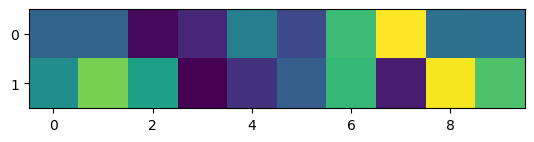

In [719]:
plt.imshow((noise_map_x,noise_map_y))